# Brent Oil Price Change Point Analysis




This notebook performs foundational analysis for identifying change points in Brent oil prices, focusing on major market events and their statistical impact.

**Business Objective**: Identify and quantify how major events affect Brent oil prices through change point detection.

## 1. Setup and Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:

# Load the data
df = pd.read_csv('BrentOilPrices.csv')

In [ ]:

# Display basic info
print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Date range: {df.iloc[0, 0]} to {df.iloc[-1, 0]}")
print("\nFirst few rows:")
df.head()

Dataset Information:
Shape: (9011, 2)
Columns: ['Date', 'Price']
Date range: 20-May-87 to Nov 14, 2022

First few rows:


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


## 2. Data Preprocessing and Understanding

In [ ]:
df.columns = ['Date', 'Price']
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Convert date column
df = df.dropna() # Remove any rows with missing dates or prices
df = df.sort_values('Date').reset_index(drop=True)# Sort by date

In [ ]:
# Basic statistics
print("Price Statistics:")
print(df['Price'].describe())
print(f"\nData Quality:")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total observations: {len(df)}")



Price Statistics:
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

Data Quality:
Missing values: 0
Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00
Total observations: 9011


In [ ]:
# Create an interactive Plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df['Date'],  # Use the Date column from your DataFrame
    y=df['Price'], # Use the Price column from your DataFrame
    mode='lines',  # Display as a line plot
    name='Brent Oil Price',
    line=dict(color='navy', width=1) # Customize line appearance
))

# Update layout for title and axis labels
fig.update_layout(
    title=dict(
        text='Brent Oil Prices Over Time',
        x=0.5, # Center the title
        xanchor='center'
    ),
    xaxis_title='Date',
    yaxis_title='Price (USD/barrel)',
    hovermode='x unified' # Enhance hover experience
)
fig.show()

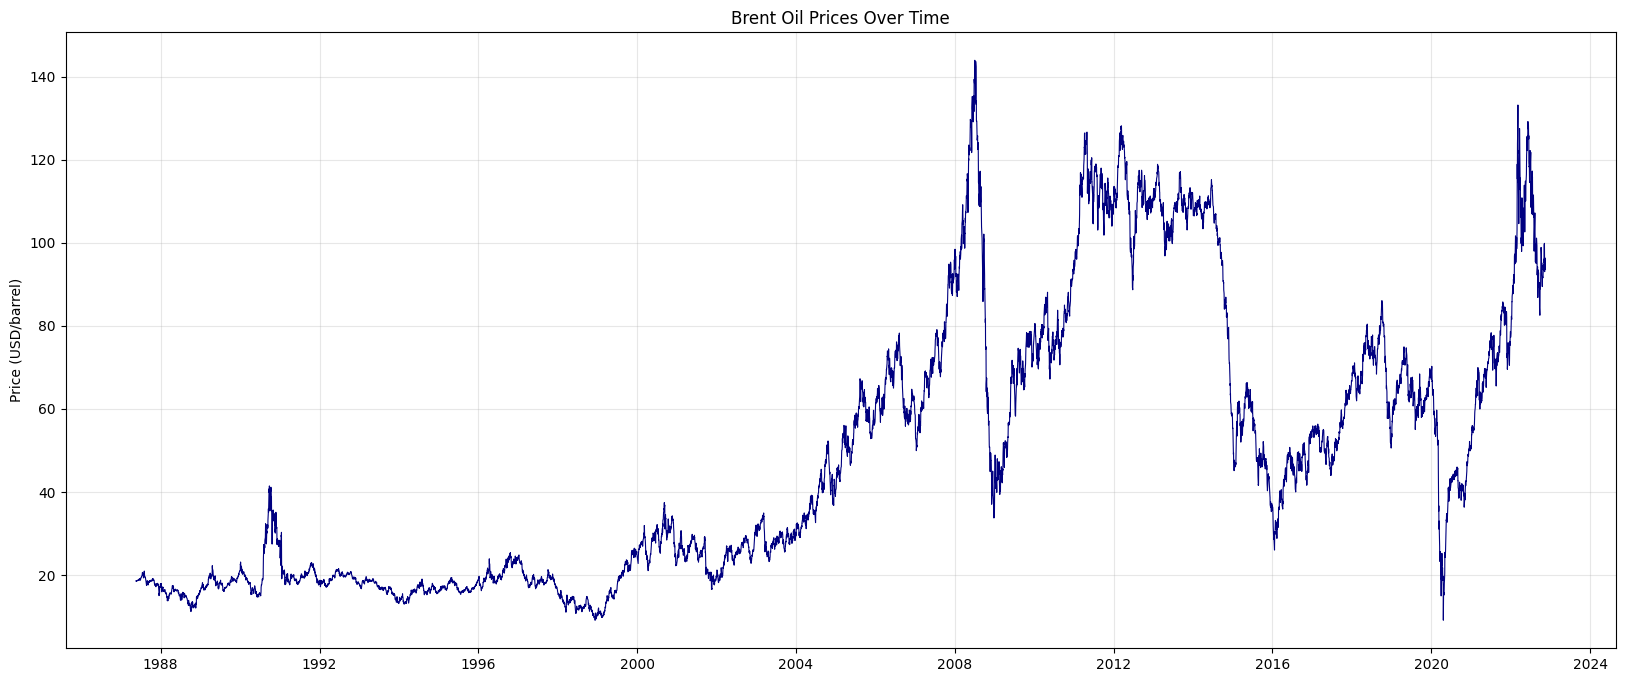

In [ ]:
fig = plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Price'], linewidth=0.8, color='navy')
plt.title('Brent Oil Prices Over Time')
plt.ylabel('Price (USD/barrel)')
plt.grid(True, alpha=0.3)
plt.show()

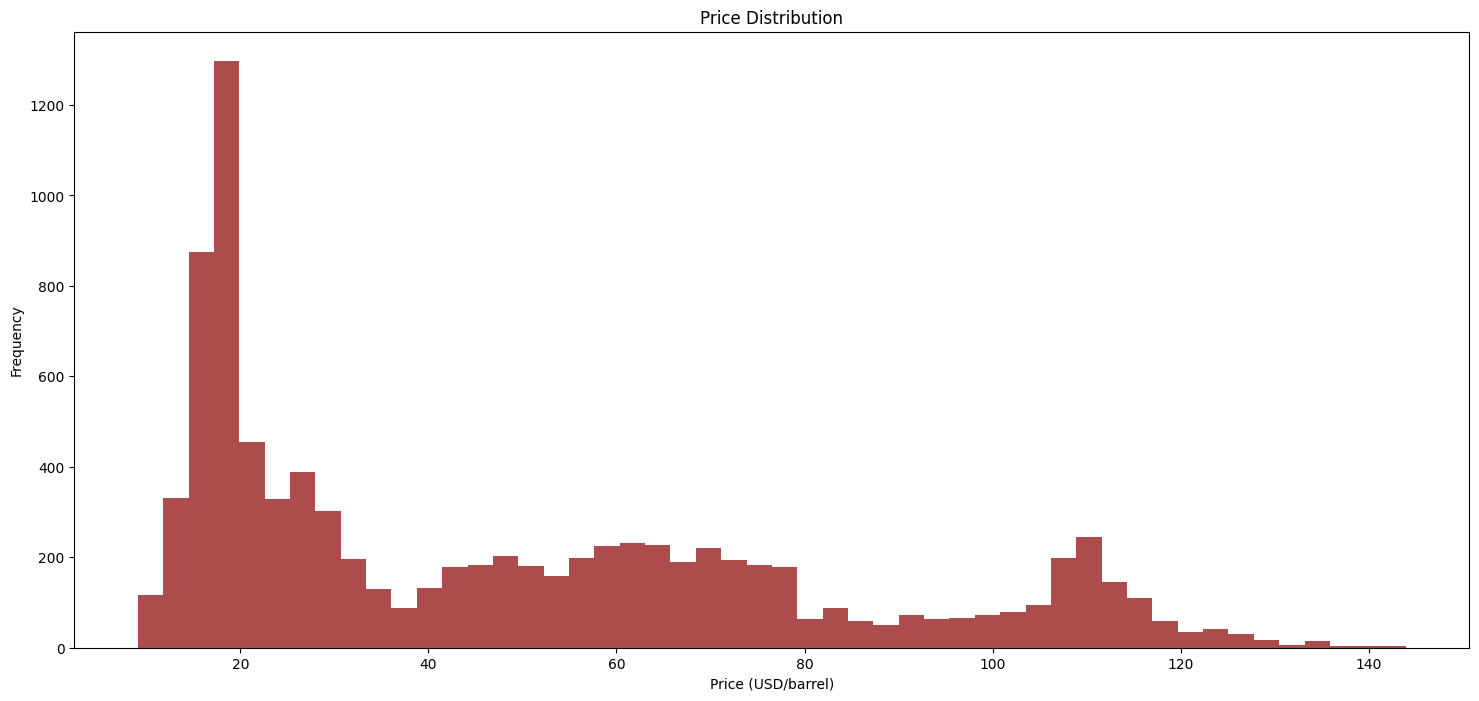

In [ ]:
# Price distribution
fig, plt.figure(figsize=(18, 8))
plt.hist(df['Price'], bins=50, alpha=0.7, color='darkred')
plt.title('Price Distribution')
plt.xlabel('Price (USD/barrel)')
plt.ylabel('Frequency')
plt.show()

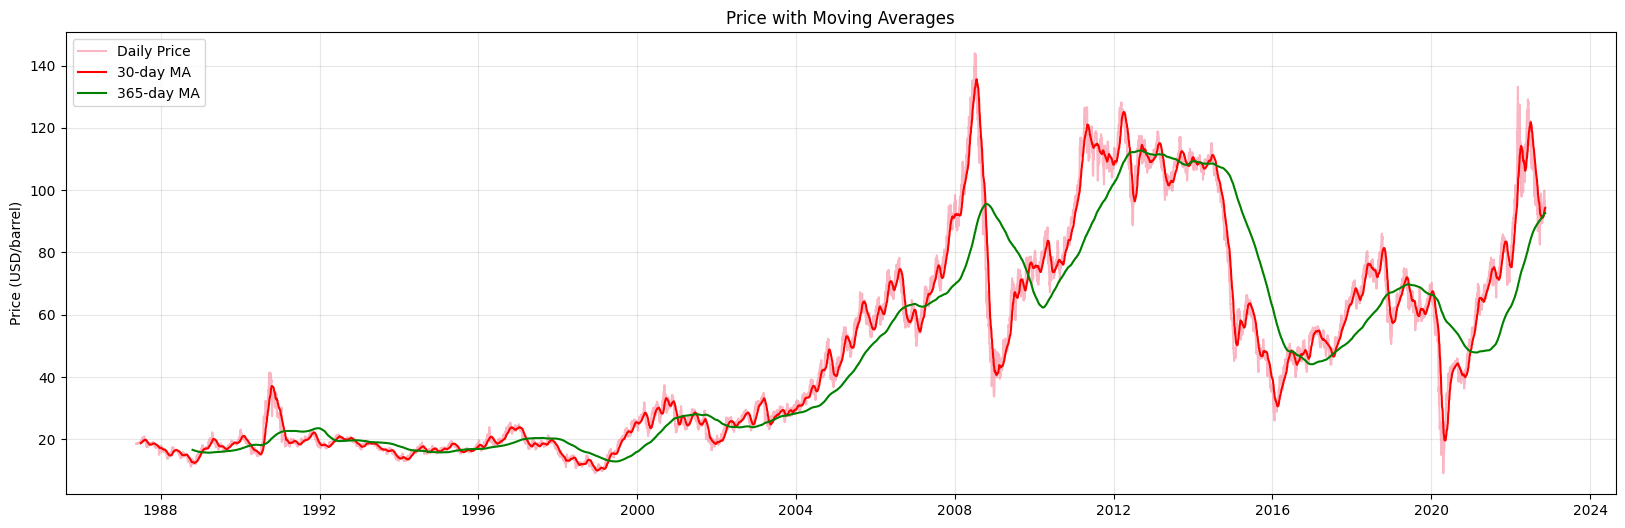

In [ ]:
# Rolling statistics
df['MA_30'] = df['Price'].rolling(30).mean()
df['MA_365'] = df['Price'].rolling(365).mean()
fig, plt.figure(figsize=(20, 6))
plt.plot(df['Date'], df['Price'], alpha=0.5, label='Daily Price')
plt.plot(df['Date'], df['MA_30'], label='30-day MA', color='red')
plt.plot(df['Date'], df['MA_365'], label='365-day MA', color='green')
plt.title('Price with Moving Averages')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid(True, alpha=0.3)

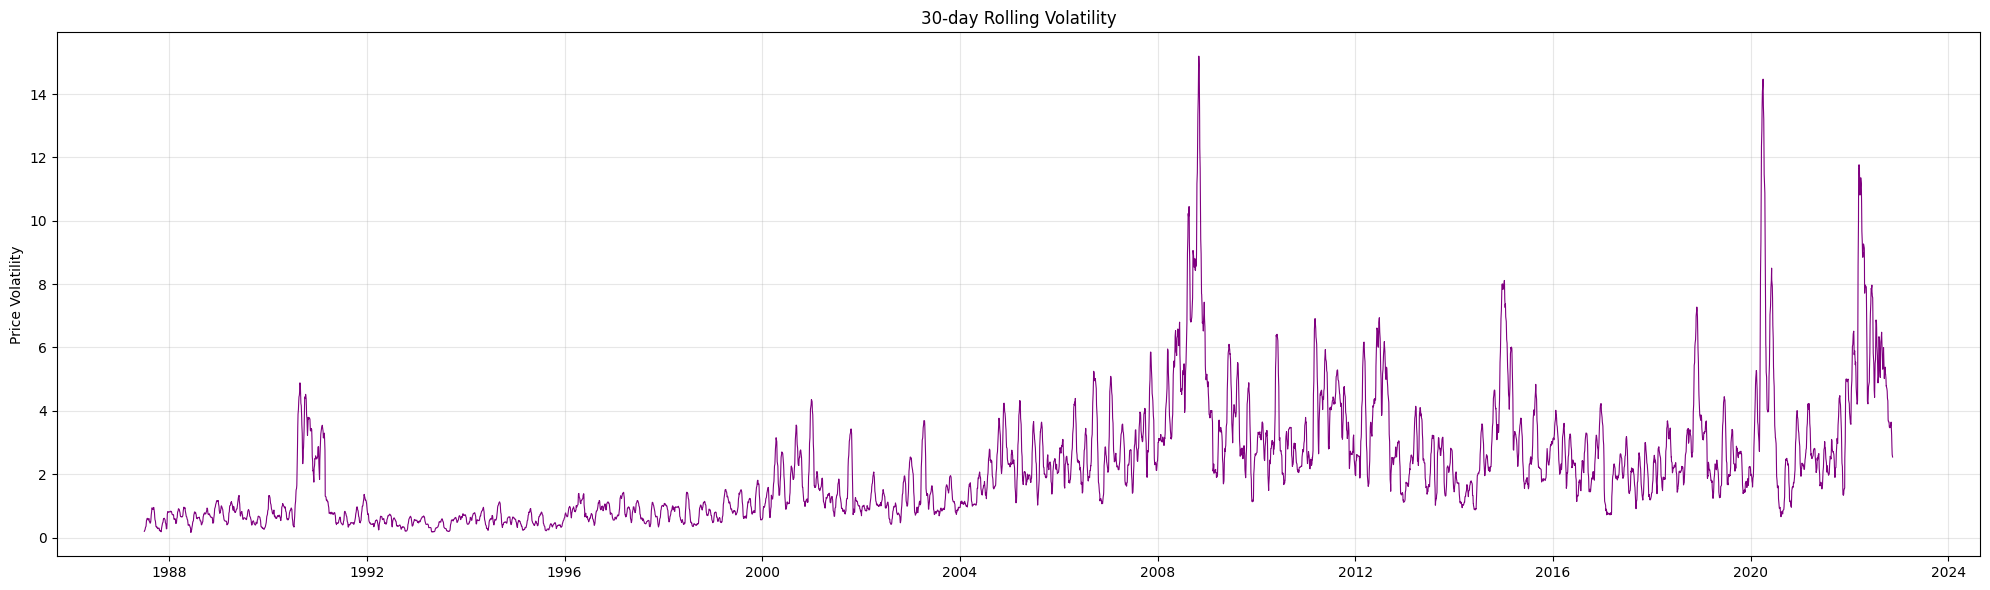

In [ ]:

fig, plt.figure(figsize=(20, 6))
# Volatility (rolling standard deviation)
df['Volatility'] = df['Price'].rolling(30).std()
plt.plot(df['Date'], df['Volatility'], color='purple', linewidth=0.8)
plt.title('30-day Rolling Volatility')
plt.ylabel('Price Volatility')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
## 4. Key Market Events Documentation
# Define major oil market events based on historical analysis
key_events = {
    'Gulf War': '1991-01-17',
    'Asian Financial Crisis': '1997-07-02',
    'Iraq War': '2003-03-20',
    'Global Financial Crisis': '2008-09-15',
    'Arab Spring': '2011-01-17',
    'Libya Civil War': '2011-02-15',
    'US Shale Boom Peak': '2014-06-01',
    'Oil Price Collapse': '2014-11-01',
    'OPEC+ Deal': '2016-11-30',
    'Venezuela Crisis': '2017-07-01',
    'US-Iran Tensions': '2019-05-01',
    'COVID-19 Pandemic': '2020-03-11',
    'Russia-Ukraine Conflict': '2022-02-24'
}

# Convert to datetime and filter for available data range
events_df = pd.DataFrame(list(key_events.items()), columns=['Event', 'Date'])
events_df['Date'] = pd.to_datetime(events_df['Date'])

# Filter events within our data range
events_df = events_df[
    (events_df['Date'] >= df['Date'].min()) &
    (events_df['Date'] <= df['Date'].max())
].reset_index(drop=True)

print("Key Market Events in Dataset:")
for _, row in events_df.iterrows():
    print(f"- {row['Event']}: {row['Date'].strftime('%Y-%m-%d')}")


Key Market Events in Dataset:
- Gulf War: 1991-01-17
- Asian Financial Crisis: 1997-07-02
- Iraq War: 2003-03-20
- Global Financial Crisis: 2008-09-15
- Arab Spring: 2011-01-17
- Libya Civil War: 2011-02-15
- US Shale Boom Peak: 2014-06-01
- Oil Price Collapse: 2014-11-01
- OPEC+ Deal: 2016-11-30
- Venezuela Crisis: 2017-07-01
- US-Iran Tensions: 2019-05-01
- COVID-19 Pandemic: 2020-03-11
- Russia-Ukraine Conflict: 2022-02-24


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Example: Replace this with your actual dataframe
df['Date'] = pd.to_datetime(df['Date'])

# Define major events (dates and labels)
events = [
    {"date": "1990-08-02", "label": "Gulf War"},
    {"date": "1997-07-02", "label": "Asian Financial Crisis"},
    {"date": "2003-03-20", "label": "Iraq War"},
    {"date": "2008-09-15", "label": "Global Financial Crisis"},
    {"date": "2014-06-01", "label": "Oil Price Collapse"},
    {"date": "2016-12-01", "label": "OPEC+ Deal"},
    {"date": "2017-07-01", "label": "Venezuela Crisis"},
    {"date": "2019-01-01", "label": "US-Iran Tensions"},
    {"date": "2020-03-11", "label": "COVID-19 Pandemic"},
    {"date": "2022-02-24", "label": "Russia-Ukraine Conflict"},
]

# Create the figure
fig = go.Figure()

# Add the Brent oil price time series
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Price'],
    mode='lines',
    name='Brent Oil Price',
    line=dict(color='navy', width=1)
))

# Add vertical lines and annotations for each event
for event in events:
    fig.add_vline(
        x=pd.to_datetime(event["date"]),
        line_width=1,
        line_dash="dash",
        line_color="red"
    )
    fig.add_annotation(
        x=pd.to_datetime(event["date"]),
        y=df['Price'].max() * 0.95,
        text=event["label"],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40,
        bgcolor="yellow",
        font=dict(size=10),
        bordercolor="black",
        borderwidth=1
    )

# Update layout
fig.update_layout(
    title='Brent Oil Prices with Major Market Events',
    xaxis_title='Date',
    yaxis_title='Price (USD/barrel)',
    template='plotly_white',
    hovermode='x unified',
    height=600,
    width=1200
)

# Show the interactive chart
fig.show()


## 5. Visual Event Impact Analysis


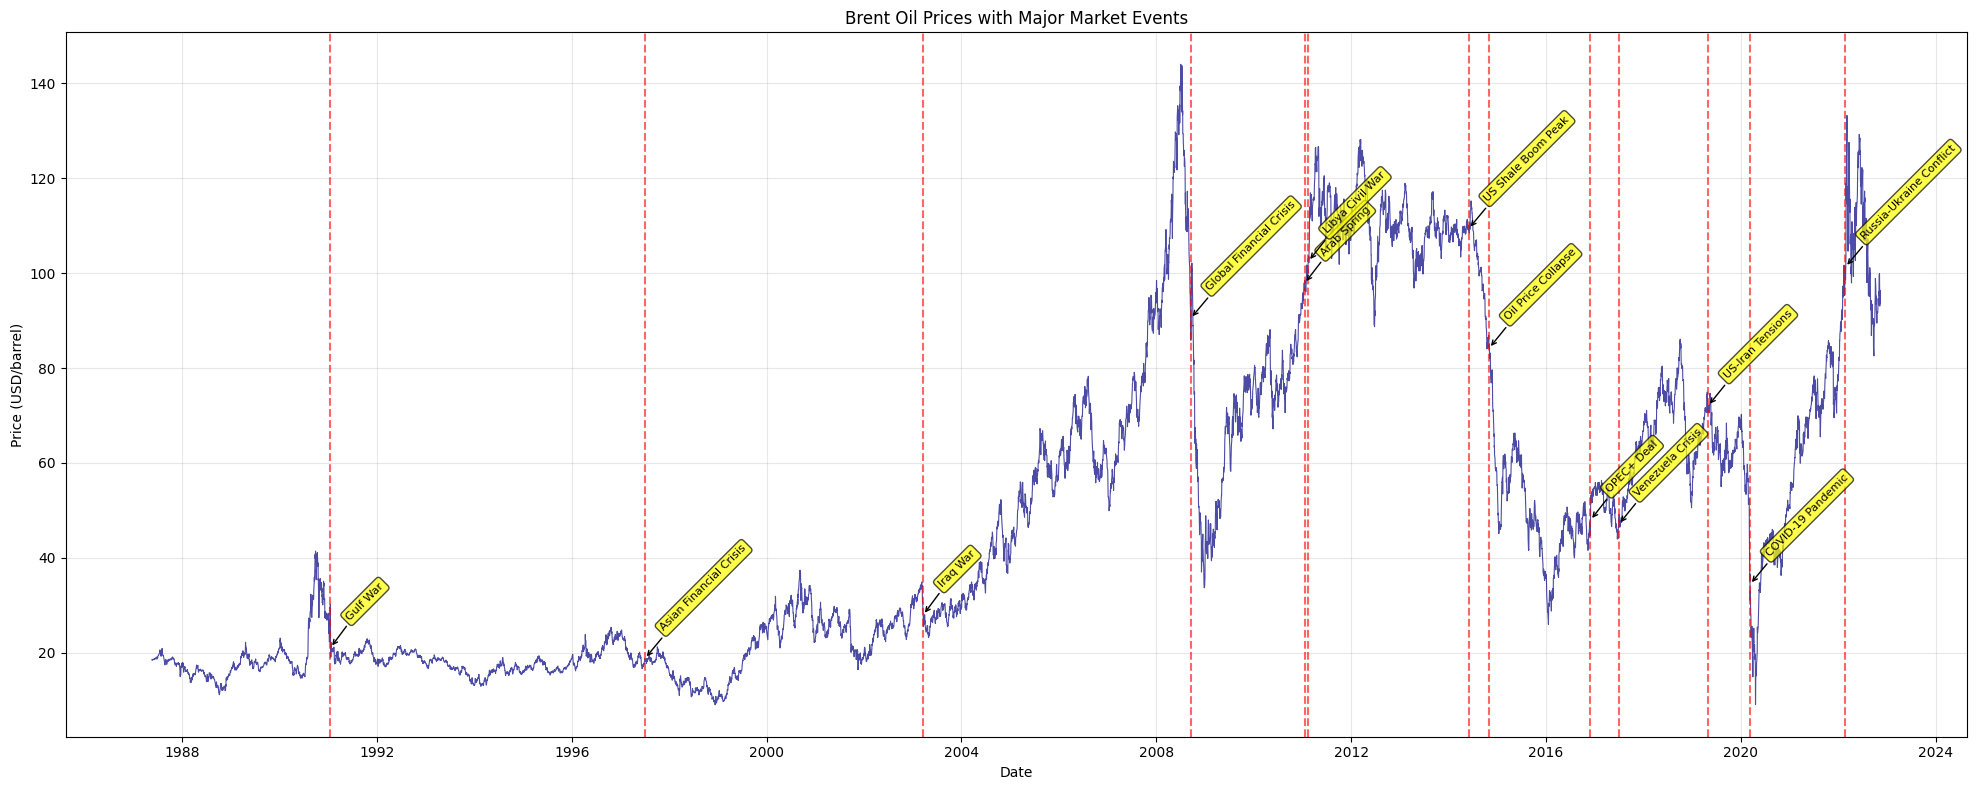

In [ ]:
# Plot price series with event markers
plt.figure(figsize=(20, 8))
plt.plot(df['Date'], df['Price'], linewidth=0.8, color='navy', alpha=0.7)

# Add event markers
for _, event in events_df.iterrows():
    plt.axvline(x=event['Date'], color='red', linestyle='--', alpha=0.6)

    # Find closest price point
    closest_idx = np.argmin(np.abs(df['Date'] - event['Date']))
    price_at_event = df.iloc[closest_idx]['Price']

    plt.annotate(event['Event'],
                xy=(event['Date'], price_at_event),
                xytext=(10, 20), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'),
                fontsize=8, rotation=45)

plt.title('Brent Oil Prices with Major Market Events')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Statistical Properties Analysis

In [ ]:
# Calculate key statistical measures
def calculate_stats(series):
    return {
        'Mean': series.mean(),
        'Std Dev': series.std(),
        'Skewness': series.skew(),
        'Kurtosis': series.kurtosis(),
        'Min': series.min(),
        'Max': series.max(),
        'Range': series.max() - series.min()
    }

# Overall statistics
overall_stats = calculate_stats(df['Price'])

print("Overall Price Statistics:")
for key, value in overall_stats.items():
    print(f"{key}: {value:.3f}")

# Calculate price changes
df['Price_Change'] = df['Price'].diff()
df['Price_Change_Pct'] = df['Price'].pct_change() * 100

# Daily change statistics
change_stats = calculate_stats(df['Price_Change'].dropna())
pct_change_stats = calculate_stats(df['Price_Change_Pct'].dropna())

print("\nDaily Price Change Statistics:")
for key, value in change_stats.items():
    print(f"{key}: {value:.3f}")

print("\nDaily Percentage Change Statistics:")
for key, value in pct_change_stats.items():
    print(f"{key}: {value:.3f}%")

Overall Price Statistics:
Mean: 48.421
Std Dev: 32.860
Skewness: 0.765
Kurtosis: -0.610
Min: 9.100
Max: 143.950
Range: 134.850

Daily Price Change Statistics:
Mean: 0.008
Std Dev: 1.216
Skewness: -0.684
Kurtosis: 13.392
Min: -16.600
Max: 10.450
Range: 27.050

Daily Percentage Change Statistics:
Mean: 0.050%
Std Dev: 2.525%
Skewness: 0.312%
Kurtosis: 45.432%
Min: -47.465%
Max: 50.987%
Range: 98.452%


## 7. Preliminary Change Point Indicators

High Volatility Periods (>14.75 threshold):
Number of periods: 876


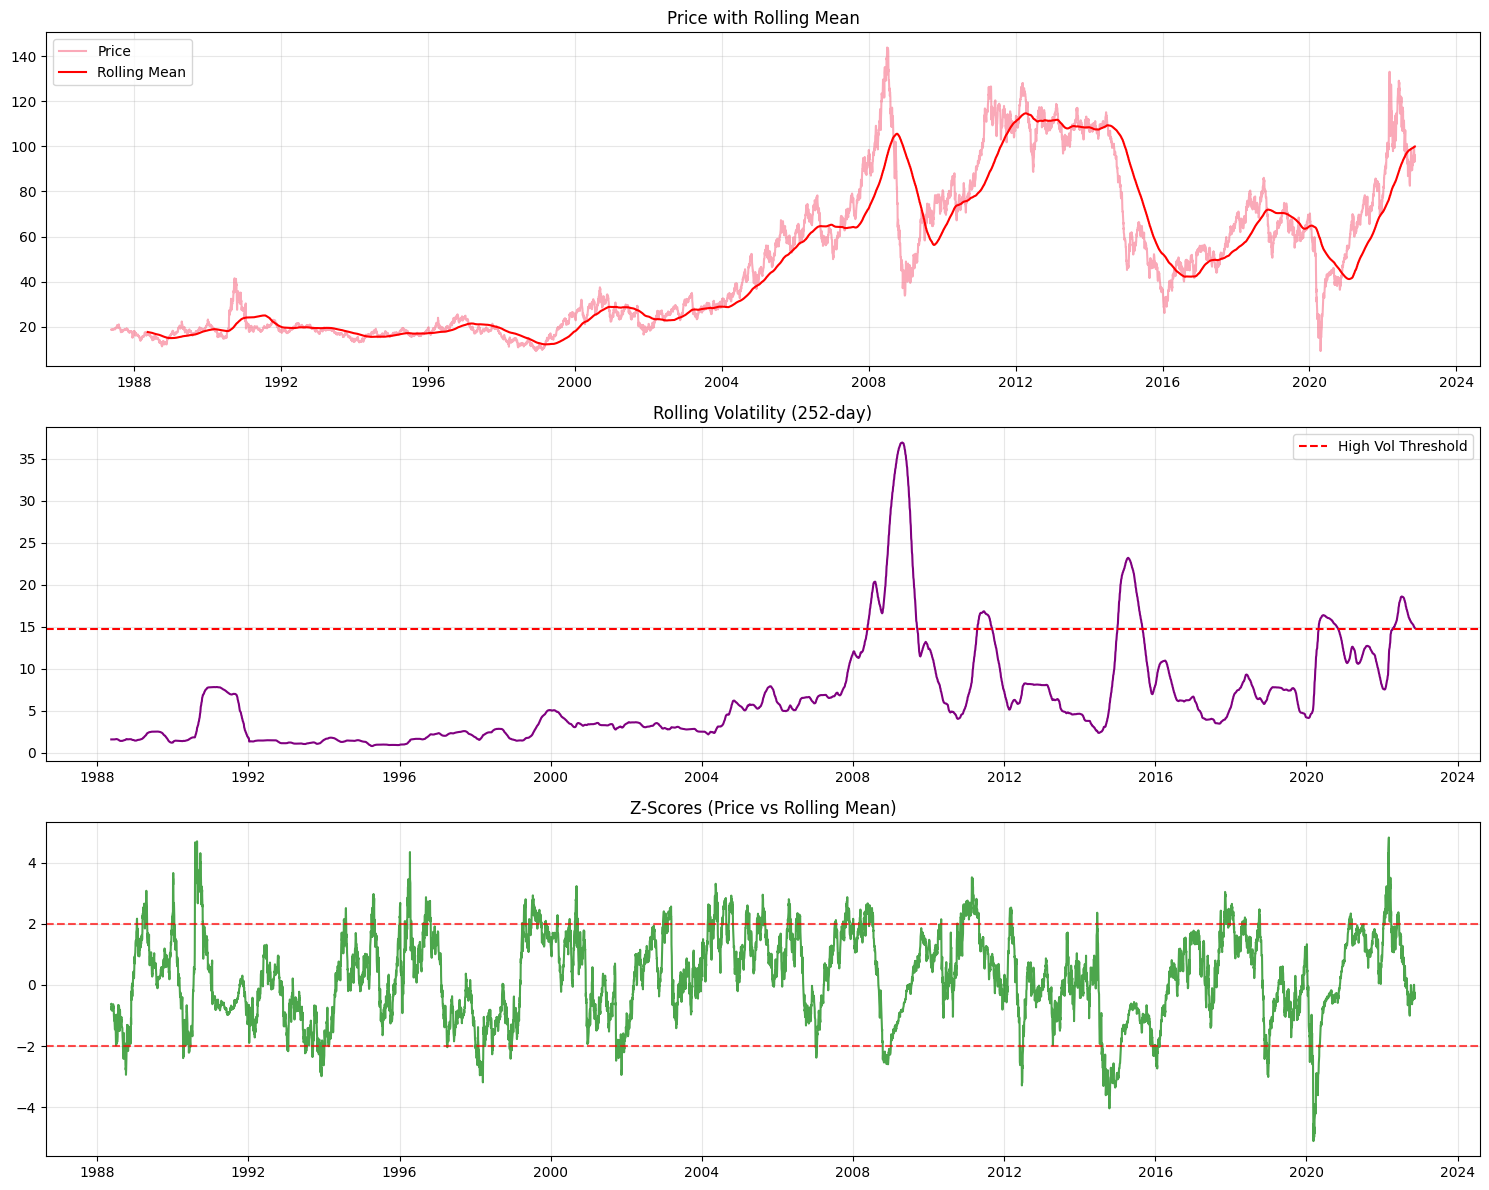

In [ ]:
# Simple change point indicators using rolling statistics
window = 252  # Approximately 1 year of trading days
# Rolling mean and std
df['Rolling_Mean'] = df['Price'].rolling(window).mean()
df['Rolling_Std'] = df['Price'].rolling(window).std()

# Z-score for detecting unusual periods
df['Z_Score'] = (df['Price'] - df['Rolling_Mean']) / df['Rolling_Std']

# Potential change points (high volatility periods)
high_volatility_threshold = df['Rolling_Std'].quantile(0.9)
potential_changes = df[df['Rolling_Std'] > high_volatility_threshold]['Date']

print(f"High Volatility Periods (>{high_volatility_threshold:.2f} threshold):")
print(f"Number of periods: {len(potential_changes)}")

# Plot indicators
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Price with rolling mean
axes[0].plot(df['Date'], df['Price'], alpha=0.6, label='Price')
axes[0].plot(df['Date'], df['Rolling_Mean'], color='red', label='Rolling Mean')
axes[0].set_title('Price with Rolling Mean')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Rolling volatility
axes[1].plot(df['Date'], df['Rolling_Std'], color='purple')
axes[1].axhline(y=high_volatility_threshold, color='red', linestyle='--', label='High Vol Threshold')
axes[1].set_title('Rolling Volatility (252-day)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Z-scores
axes[2].plot(df['Date'], df['Z_Score'], color='green', alpha=0.7)
axes[2].axhline(y=2, color='red', linestyle='--', alpha=0.7)
axes[2].axhline(y=-2, color='red', linestyle='--', alpha=0.7)
axes[2].set_title('Z-Scores (Price vs Rolling Mean)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ANALYSIS METHODOLOGY FRAMEWORK
==================================================

Data Preparation:
  1. Clean and validate time series data
  2. Handle missing values and outliers
  3. Create derived features (returns, volatility)

Exploratory Analysis:
  1. Visualize price trends and patterns
  2. Identify potential structural breaks visually
  3. Analyze statistical properties of different periods

Change Point Detection:
  1. Apply Bayesian change point analysis
  2. Use MCMC sampling for posterior inference
  3. Validate results with multiple methods

Event Impact Analysis:
  1. Map detected changes to historical events
  2. Quantify magnitude and persistence of impacts
  3. Statistical significance testing

Business Intelligence:
  1. Develop actionable insights
  2. Create risk assessment framework
  3. Policy and investment recommendations

ANALYSIS METHODOLOGY FRAMEWORK
==================================================

Data Preparation:
  1. Clean and validate time series data
  2. Handle missing values and outliers
  3. Create derived features (returns, volatility)

Exploratory Analysis:
  1. Visualize price trends and patterns
  2. Identify potential structural breaks visually
  3. Analyze statistical properties of different periods

Change Point Detection:
  1. Apply Bayesian change point analysis
  2. Use MCMC sampling for posterior inference
  3. Validate results with multiple methods

Event Impact Analysis:
  1. Map detected changes to historical events
  2. Quantify magnitude and persistence of impacts
  3. Statistical significance testing

Business Intelligence:
  1. Develop actionable insights
  2. Create risk assessment framework
  3. Policy and investment recommendations

In [ ]:
!pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import mpld3

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Create an interactive Plotly figure
fig = go.Figure()

# Add the Brent Oil Price trace
fig.add_trace(go.Scatter(
    x=df['Date'],  # Use the Date column from your DataFrame
    y=df['Price'], # Use the Price column from your DataFrame
    mode='lines',  # Display as a line plot
    name='Brent Oil Price',
    line=dict(color='navy', width=1) # Customize line appearance
))
# Update layout for title and axis labels
fig.update_layout(
    title=dict(
        text='Brent Oil Prices Over Time',
        x=0.5, # Center the title
        xanchor='center'
    ),
    xaxis_title='Date',
    yaxis_title='Price (USD/barrel)',
    hovermode='x unified' # Enhance hover experience
)
# Display the interactive plot
fig.show()